In [26]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
from datetime import datetime

abs_path = os.path.abspath("")



## 510k

In [27]:
'''Searching functions are ready, there are 10 parameters for filtering: ['KNUMBER', 'APPLICANT', "COUNTRY_CODE", "DATERECEIVED", 'DECISIONDATE', "DECISION", 'PRODUCTCODE', "STATEORSUMM", "THIRDPARTY", 'DEVICENAME']. Only  "DATERECEIVED", 'DECISIONDATE' take list as parameters, [year, mode]'''

'Searching functions are ready, there are 10 parameters for filtering: [\'KNUMBER\', \'APPLICANT\', "COUNTRY_CODE", "DATERECEIVED", \'DECISIONDATE\', "DECISION", \'PRODUCTCODE\', "STATEORSUMM", "THIRDPARTY", \'DEVICENAME\']. Only  "DATERECEIVED", \'DECISIONDATE\' take list as parameters, [year, mode]'

In [28]:
data_file_list = ["pmnlstmn.txt", "pmn96cur.txt", "pmn9195.txt", "pmn8690.txt", "pmn8185.txt", "pmn7680.txt"]
data_list = []
for i in range(len(data_file_list)):
    path = os.path.join(abs_path, "FDA Registration Record", "510k", data_file_list[i])
    data_list.append(pd.read_csv(path, sep= "|", encoding="cp1252"))

DATA = pd.concat(data_list)
DATA = DATA.reset_index(drop=True)


In [29]:
FDA_INFO_510K = DATA[['KNUMBER', 'APPLICANT', "COUNTRY_CODE", "DATERECEIVED", 'DECISIONDATE', "DECISION", 'PRODUCTCODE', "STATEORSUMM", "THIRDPARTY", 'DEVICENAME']]
FDA_INFO_510K = FDA_INFO_510K.rename({'APPLICANT':'MANUFACTURER', "DEVICENAME":"MODELNAME"}, axis="columns")
FDA_INFO_510K = FDA_INFO_510K.replace(np.nan, "NA", regex=True)
FDA_INFO_510K['DATERECEIVED'] = pd.to_datetime(FDA_INFO_510K['DATERECEIVED'], errors = "coerce")
FDA_INFO_510K['DECISIONDATE'] = pd.to_datetime(FDA_INFO_510K['DECISIONDATE'], errors = "coerce")

In [30]:
import datetime as dt

In [31]:
# FDA_INFO_510K = FDA_INFO_510K.replace(np.nan, "NA", regex=True)
# FDA_INFO_510K["NAME"] = FDA_INFO_510K["MODELNAME"].str.cat(
#     FDA_INFO_510K["MANUFACTOR"].astype(str), sep="-")
# FDA_INFO_510K

In [32]:
import datetime as dt
filter_510k_kNumber = lambda df, knumber : df[df["KNUMBER"].str.lower() == knumber.lower()]
filter_510k_manufacturer = lambda df, manufacturer : df[df["MANUFACTURER"].str.lower().str.contains(manufacturer.lower())]
filter_510k_countryCode = lambda df, countryCode : df[df["COUNTRY_CODE"].str.lower() == countryCode.lower()]
# mode = [before, in, after]
def filter_510k_dateReceived(df, year_mode):
    if year_mode[1] == 'before':
        result_df = df[df["DATERECEIVED"].dt.year < year_mode[0]]
    elif year_mode[1] == "in":
        result_df = df[df["DATERECEIVED"].dt.year == year_mode[0]]
    else:
        result_df = df[df["DATERECEIVED"].dt.year > year_mode[0]]
    return result_df
# mode = [before, in, after]
def filter_510k_decisionDate(df, year_mode):
    if year_mode[1] == 'before':
        result_df = df[df["DECISIONDATE"].dt.year < year_mode[0]]
    elif year_mode[1] == "in":
        result_df = df[df["DECISIONDATE"].dt.year == year_mode[0]]
    else:
        result_df = df[df["DECISIONDATE"].dt.year > year_mode[0]]
    return result_df
filter_510k_decision = lambda df, decision : df[df["DECISION"].str.lower() == decision.lower()]
filter_510k_productCode = lambda df, productCode : df[df["PRODUCTCODE"].str.lower() == productCode.lower()]
filter_510k_stateOrSum = lambda df, stateOrSum : df[df["STATEORSUMM"].str.lower() == stateOrSum.lower()]
filter_510k_thirdParty = lambda df, thirdParty : df[df["THIRDPARTY"].str.lower() == thirdParty.lower()]
filter_510k_modelName = lambda df, modelName: df[df["MODELNAME"].str.lower().str.contains(modelName.lower())]

func_list = [filter_510k_kNumber, filter_510k_manufacturer, filter_510k_countryCode, filter_510k_dateReceived, filter_510k_decisionDate, filter_510k_decision, filter_510k_productCode, filter_510k_stateOrSum, filter_510k_thirdParty, filter_510k_modelName]

In [33]:
def filter_510k(df, knumber = None, manufacturer = None, countryCode = None, dateReceived = None, decisionDate = None, decision = None, productCode = None, stateOrSum = None, thirdParty = None, ModelName = None):
    input_list = [knumber, manufacturer, countryCode, dateReceived, decisionDate, decision, productCode, stateOrSum, thirdParty, ModelName]
    result_df = df
    for i in range(len(input_list)):
        if input_list[i] != None:
            result_df = func_list[i](result_df, input_list[i])
    return result_df

In [34]:
result = filter_510k(FDA_INFO_510K)
result

,KNUMBER,MANUFACTURER,COUNTRY_CODE,DATERECEIVED,DECISIONDATE,DECISION,PRODUCTCODE,STATEORSUMM,THIRDPARTY,MODELNAME
0,DEN190035,"Helix OpCo, LLC",CA,2019-08-02,2020-12-23,DENG,QNC,NA,N,Helix Laboratory Platform
1,K190217,"Aidite (Qinhuangdao) Technology Co., Ltd.",CN,2019-02-04,2020-12-17,SESE,EBG,Summary,N,Aidite PMMA
2,K191978,"HuBDIC Co., Ltd.",KR,2019-07-24,2020-12-18,SESE,FLL,Summary,N,Fever Garde
3,K192073,"Helix OpCo, LLC",CA,2019-08-02,2020-12-23,SESE,PTA,Summary,N,Helix Genetic Health Risk App for late-onset A...
4,K192308,"Wu's Tech Co., Ltd.",TW,2019-08-26,2020-12-21,SESE,INI,Summary,N,Wu's Electrical Scooter
...,...,...,...,...,...,...,...,...,...,...
158463,K803151,"ABCO DEALERS, INC.",US,1980-12-12,1980-12-30,SESE,GYB,NA,N,"ECG & ULTRASOUND GELS, CREAMS & LOTION"
158464,K803165,"ZIMMER, INC.",US,1980-12-15,1980-12-31,SESE,HXO,NA,N,ACETABULAR CEMENT COMPRESSOR
158465,K803174,"CONPHAR, INC.",US,1980-12-15,1980-12-30,SESE,GWZ,NA,N,CONPHAR PERCUSSION HAMMER(BUCK TYPE)
158466,K803177,"DURO-MED IND., INC.",US,1980-12-16,1980-12-31,SESE,IMA,NA,N,MOIST HEAT PACK


## General Number of Results Analysis:

In [35]:
# example
def analyze_num_of_df(df):
    return df.shape[0]

In [36]:

result_df = filter_510k(FDA_INFO_510K, thirdParty= "Y", )
result = analyze_num_of_df(result_df)
result

3126

## Average Time Analysis

In [37]:
def analyze_averagetime_of_df(df):
    return df.shape[0]

In [38]:
date_format = "%Y-%m-%d %H:%M:%S"
def cal_time_length(date1, date2):
    d0 = datetime.strptime(str(date1), date_format)
    d1 = datetime.strptime(str(date2), date_format)
    delta = d1 - d0
    return delta.days

In [39]:
#filter application
AVERAGE_TIME_df = filter_510k(FDA_INFO_510K, productCode = "CBK", dateReceived = None, decisionDate = None)
#optional: changing timeframes
recieved_date = AVERAGE_TIME_df['DATERECEIVED'].tolist()
decision_date = AVERAGE_TIME_df['DECISIONDATE'].tolist()
time_length = []
for i in range(len(recieved_date)):
    time_length.append(cal_time_length(recieved_date[i], decision_date[i]))
AVERAGE_TIME_df['DecisionDates'] = time_length
AVERAGE_TimeLength = AVERAGE_TIME_df.groupby('PRODUCTCODE', as_index= False)['DecisionDates'].mean()

<ipython-input-39-7e030a84c69c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AVERAGE_TIME_df['DecisionDates'] = time_length


In [40]:
AVERAGE_ProductCode = AVERAGE_TimeLength['PRODUCTCODE'].value_counts()[:10].index.tolist()
AVERAGE_TIME_TOP10results = AVERAGE_TimeLength.loc[AVERAGE_TimeLength['PRODUCTCODE'].isin(AVERAGE_ProductCode)]
AVERAGE_TIME_TOP10results.sort_values(by=['DecisionDates'], ascending= False).head(10)

,PRODUCTCODE,DecisionDates
0,CBK,168.419624


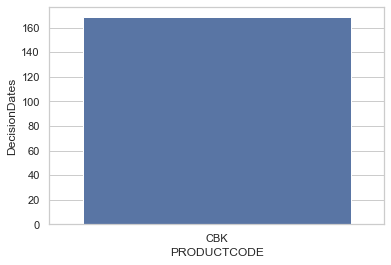

In [41]:
sns.set_theme(style="whitegrid")
aver_t_plot = sns.barplot(x = "PRODUCTCODE", y = "DecisionDates", data = AVERAGE_TIME_TOP10results)
plt.show()

## Average time Analysis Ordered By Country Modification Example

In [42]:
#filter application
AVERAGE_TIME_df_CountryCode = filter_510k(FDA_INFO_510K, countryCode = "CN", dateReceived = [2018, "after"], decisionDate = None)
#optional: changing timeframes
recieved_date = AVERAGE_TIME_df_CountryCode['DATERECEIVED'].tolist()
decision_date = AVERAGE_TIME_df_CountryCode['DECISIONDATE'].tolist()
time_length = []
for i in range(len(recieved_date)):
    time_length.append(cal_time_length(recieved_date[i], decision_date[i]))
AVERAGE_TIME_df_CountryCode['DecisionDates'] = time_length
AVERAGE_TimeLength_CC = AVERAGE_TIME_df_CountryCode.groupby('COUNTRY_CODE', as_index= False)['DecisionDates'].mean()

In [43]:
AVERAGE_CountryCode = AVERAGE_TimeLength_CC['COUNTRY_CODE'].value_counts()[:10].index.tolist()
AVERAGE_TIME_resultsCC = AVERAGE_TimeLength_CC.loc[AVERAGE_TimeLength_CC['COUNTRY_CODE'].isin(AVERAGE_CountryCode)]
AVERAGE_TIME_resultsCC.sort_values(by=['DecisionDates'], ascending= False).head(10)

,COUNTRY_CODE,DecisionDates
0,CN,160.728516


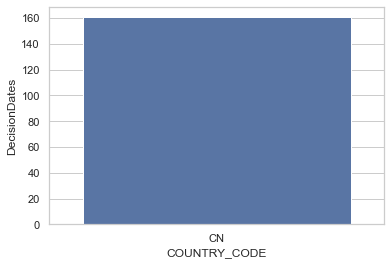

In [44]:
sns.set_theme(style="whitegrid")
aver_t_plot = sns.barplot(x = "COUNTRY_CODE", y = "DecisionDates", data = AVERAGE_TIME_resultsCC)
plt.show()

## Compare and Contrast Trends Over Time

In [45]:
APPLICANT_YEAR = filter_510k(FDA_INFO_510K, countryCode = None, productCode = None, dateReceived = None, decisionDate = None)

In [46]:
received_date = APPLICANT_YEAR['DATERECEIVED'].tolist()
received_year = []
for date in received_date:
    new_date = datetime.strptime(str(date), date_format)
    received_year.append(new_date.year)
APPLICANT_YEAR['YEARRECEIVED'] = received_year

In [47]:
AP_NUM_15 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'] >= 2015]
AP_NUM_10 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'].isin(range(2010,2015))]
AP_NUM_05 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'].isin(range(2005,2010))]
AP_NUM_00 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'].isin(range(2000,2005))]
AP_NUM_95 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'].isin(range(1995,2000))]
AP_NUM_90 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'] < 1995]
if (len(AP_NUM_15) + len(AP_NUM_10) + len(AP_NUM_05) + len(AP_NUM_00) + len(AP_NUM_95) + len(AP_NUM_90)) == len(APPLICANT_YEAR):
    print("split successfully!")
else:
    print(f"Splitted number is {(len(AP_NUM_15) + len(AP_NUM_10) + len(AP_NUM_05) + len(AP_NUM_00) + len(AP_NUM_95) + len(AP_NUM_90))}")
    print(f'Total Number is {len(APPLICANT_YEAR)}')


split successfully!


In [48]:
d = {"Time Period":[ "1995", "2000", "2005", "2010", "2015", "2020"], "Number"  : [ len(AP_NUM_90),  len(AP_NUM_95), len(AP_NUM_00), len(AP_NUM_05), len(AP_NUM_10), len(AP_NUM_15),]}
APP_NUMBER_TREND = pd.DataFrame(data  = d)
APP_NUMBER_TREND

,Time Period,Number
0,1995,72421
1,2000,20152
2,2005,17230
3,2010,15797
4,2015,15492
5,2020,17376


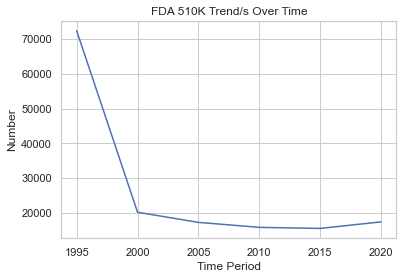

In [49]:
sns.lineplot(data=APP_NUMBER_TREND, x="Time Period", y="Number").set_title("FDA 510K Trend/s Over Time")
plt.show()

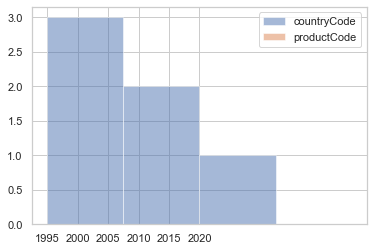

In [50]:
x = APP_NUMBER_TREND["Time Period"]
y = APP_NUMBER_TREND["Number"]

bins = np.linspace(0, 10, 5)

plt.hist(x, bins, alpha=0.5, label='countryCode')
plt.hist(y, bins, alpha=0.5, label='productCode')
plt.legend(loc='upper right')
plt.show()

In [55]:
def show_trend(df):
    received_date = df['DATERECEIVED'].tolist()
    received_year = []
    for date in received_date:
        new_date = datetime.strptime(str(date), date_format)
        received_year.append(new_date.year)
    df['YEARRECEIVED'] = received_year
    AP_NUM_15 = df[df['YEARRECEIVED'] >= 2015]
    AP_NUM_10 = df[df['YEARRECEIVED'].isin(range(2010,2015))]
    AP_NUM_05 = df[df['YEARRECEIVED'].isin(range(2005,2010))]
    AP_NUM_00 = df[df['YEARRECEIVED'].isin(range(2000,2005))]
    AP_NUM_95 = df[df['YEARRECEIVED'].isin(range(1995,2000))]
    AP_NUM_90 = df[df['YEARRECEIVED'] < 1995]

    if (len(AP_NUM_15) + len(AP_NUM_10) + len(AP_NUM_05) + len(AP_NUM_00) + len(AP_NUM_95) + len(AP_NUM_90)) == len(APPLICANT_YEAR):
        print("split successfully!")
    else:
        print(f"Splitted number is {(len(AP_NUM_15) + len(AP_NUM_10) + len(AP_NUM_05) + len(AP_NUM_00) + len(AP_NUM_95) + len(AP_NUM_90))}")
        print(f'Total Number is {len(APPLICANT_YEAR)}')
    d = {"Time Period":[ "1995", "2000", "2005", "2010", "2015", "2020"], "Number"  : [ len(AP_NUM_90),  len(AP_NUM_95), len(AP_NUM_00), len(AP_NUM_05), len(AP_NUM_10), len(AP_NUM_15),]}
    APP_NUMBER_TREND = pd.DataFrame(data  = d)
    sns.lineplot(data=APP_NUMBER_TREND, x="Time Period", y="Number").set_title("FDA 510K Trend/s Over Time")
    plt.show()

    


split successfully!


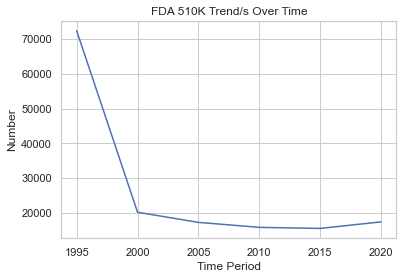

In [56]:
APPLICANT_YEAR = filter_510k(FDA_INFO_510K, countryCode = None, productCode = None, dateReceived = None, decisionDate = None)
show_trend(APPLICANT_YEAR)